In [152]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE,r2_score as R2
from sklearn.model_selection import train_test_split

In [116]:
df=pd.read_csv("SML lab 1 Simple linear  regression/mycar.csv")

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  50 non-null     int64
 1   speed       50 non-null     int64
 2   dist        50 non-null     int64
dtypes: int64(3)
memory usage: 1.3 KB


In [118]:
df.describe()

,Unnamed: 0,speed,dist
count,50.00000,50.000000,50.000000
mean,25.50000,15.400000,42.980000
std,14.57738,5.287644,25.769377
min,1.00000,4.000000,2.000000
25%,13.25000,12.000000,26.000000
50%,25.50000,15.000000,36.000000
75%,37.75000,19.000000,56.000000
max,50.00000,25.000000,120.000000


In [119]:
df.head()

,Unnamed: 0,speed,dist
0,1,4,2
1,2,4,10
2,3,7,4
3,4,7,22
4,5,8,16


In [120]:
df.isnull().sum()

Unnamed: 0    0
speed         0
dist          0
dtype: int64

In [121]:
dF = df.iloc[:, 1:]

In [122]:
dF.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [123]:
x=dF["speed"].values
y=dF["dist"].values

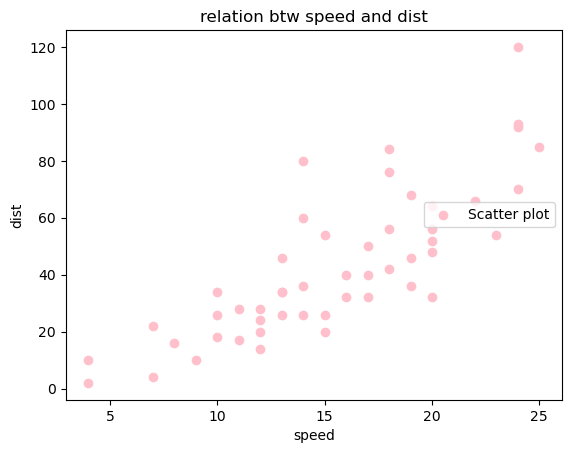

In [124]:
plt.scatter(x,y,color='pink',label='Scatter plot')
plt.title("relation btw speed and dist")
plt.xlabel("speed")
plt.ylabel("dist")
plt.legend(loc = 5)
plt.show()

In [125]:
print(x.shape)
print(y.shape)

(50,)
(50,)


In [126]:
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

In [127]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [128]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(40, 1)
(40, 1)
(10, 1)
(10, 1)


In [144]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [146]:
y_pred=model.predict(x_test)

In [150]:
a=model.coef_
b=model.intercept_
print("estimated slope a:",a)
print("estimated intercept b :",b)

estimated slope a: [[3.68568726]]
estimated intercept b : [-14.13388231]


In [158]:
mse=MSE(y_test,y_pred)
rmse=np.sqrt(mse)
r2=R2(y_test,y_pred)

In [160]:
print(f"MSE:{mse}")
print(f"RMSE:{rmse}")
print(f"r2 score:{r2}")

MSE:275.4289828774238
RMSE:16.596053231941134
r2 score:0.6157734182280232


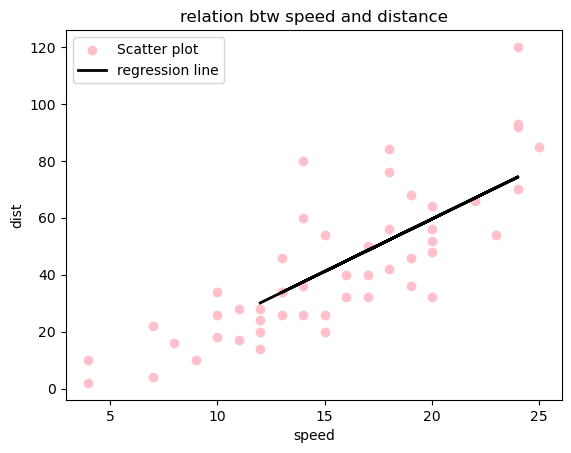

In [174]:
plt.scatter(x,y,color='pink',label="Scatter plot")
plt.plot(x_test,y_pred,linewidth=2,color='black',label="regression line")
plt.xlabel("speed")
plt.ylabel("dist")
plt.title("relation btw speed and distance")
plt.legend()
plt.show()


# Multiple Linear Regression

In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse , r2_score as r2
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression as LR

In [234]:
df=pd.read_csv("SML lab 2 multiple linear regression/Assignment 2 Advertising.csv")

In [236]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [238]:
df=df.iloc[:,1:]

In [240]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [242]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


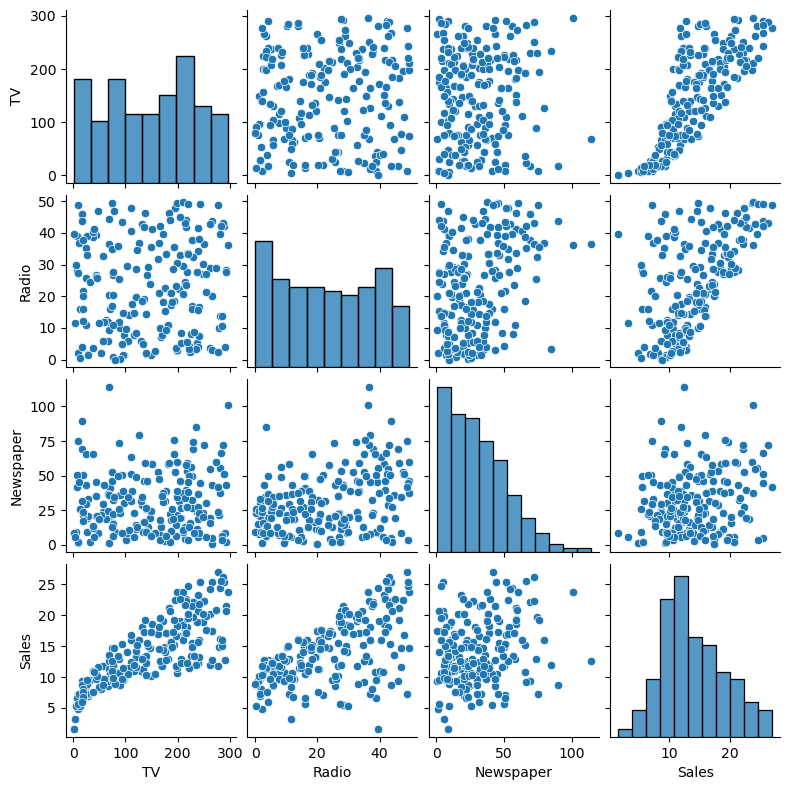

In [360]:
sns.pairplot(data = df, height=2)
plt.show()

In [352]:
corr_matrix = x.corr()
print(corr_matrix)

                 TV     Radio  Newspaper
TV         1.000000  0.054809   0.056648
Radio      0.054809  1.000000   0.354104
Newspaper  0.056648  0.354104   1.000000


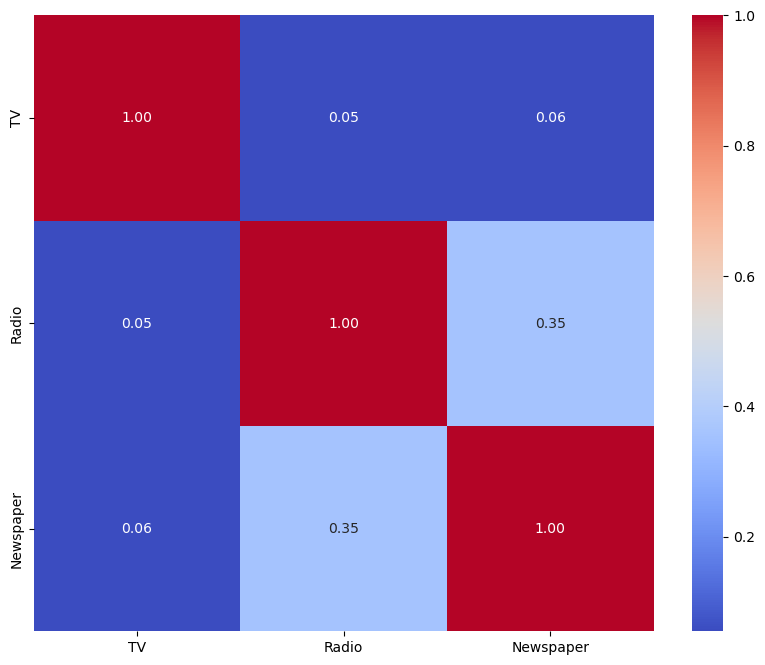

In [358]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

In [254]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
def calc_vif(X):
    vif_df=pd.DataFrame()
    vif_df["variables"]=X.columns
    vif_df["vif"]=[vif(X.values,i)for i in range(X.shape[1])]
    return(vif_df)

# from statsmodels.stats.outliers_influence import variance_inflation_factor
# import pandas as pd

# def calc_vif(X):
#     vif = pd.DataFrame()
#     vif["variables"] = X.columns
#     vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#     return(vif) #vif uses r2 score to calculate 

In [268]:
X= df.iloc[:,:-1]
calc_vif(X)

,variables,vif
0,TV,2.486772
1,Radio,3.285462
2,Newspaper,3.055245


In [278]:
x=df[['TV','Radio','Newspaper']]
y=df['Sales']

In [280]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [286]:
lm=LR()
lm.fit(x_train,y_train)

LinearRegression()

In [290]:
y_pred=lm.predict(x_test)

In [294]:
a=lm.coef_
b=lm.intercept_
print("estimated slope a:",a)
print("estimated slope b:",b)

estimated slope a: [0.04472952 0.18919505 0.00276111]
estimated slope b: 2.979067338122629


In [302]:
lm_diff=pd.DataFrame({'Actual Value': y_test,'predicted value' : y_pred})
lm_diff.head()

,Actual Value,predicted value
95,16.9,16.408024
15,22.4,20.889882
30,21.4,21.553843
158,7.3,10.608503
128,24.7,22.112373


In [304]:
mse=mse(y_test,y_pred)
rmse=np.sqrt(mse)
r2_score=r2(y_test,y_pred)

In [334]:
print(x_train.shape)
print(y_train.shape)

(160, 3)
(160,)


In [328]:
print("Mean sq error : {:.3f} ".format( mse))
print("RMSE : {:.3f}".format(rmse))
# print(f"{r2 score:.3f}",format.r2_score)
print("r2_score is : {:.3f}".format(r2_score)) 


Mean sq error : 3.174 
RMSE : 1.782
r2_score is : 0.899


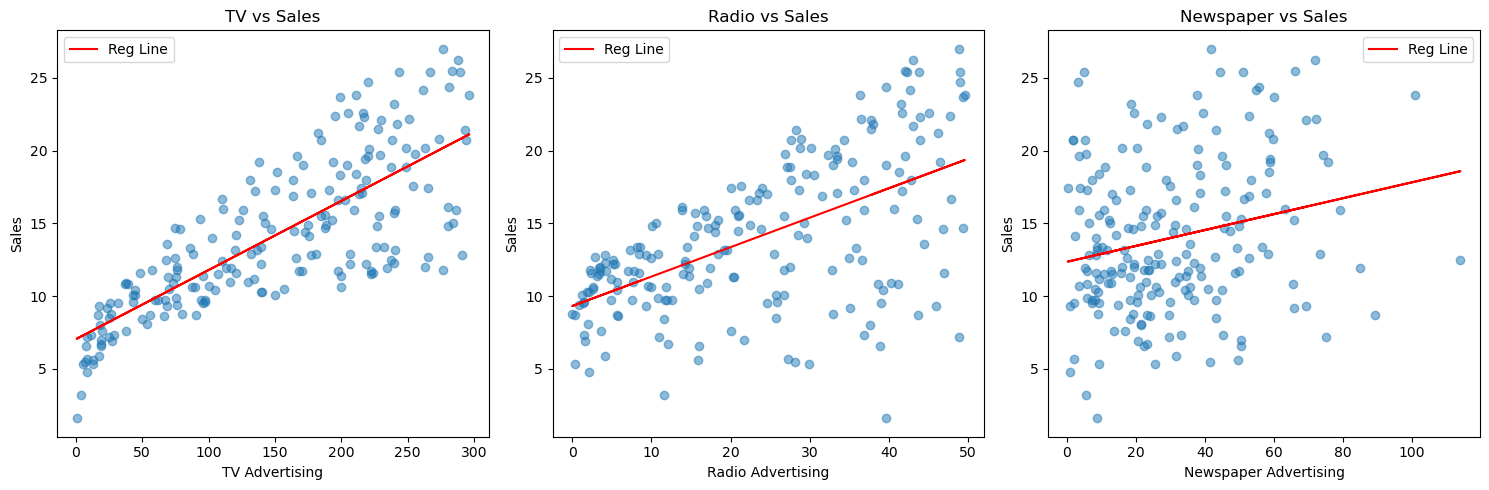

In [348]:
fig,axes = plt.subplots(1,3,figsize=(15,5))
columns = ['TV','Radio','Newspaper']
titles = ['TV vs Sales', 'Radio vs Sales', 'Newspaper vs Sales']
x_labels=['TV Advertising', 'Radio Advertising', 'Newspaper Advertising']
def scatter_plot(ax,x_data,y_data,x_label,title):
    ax.scatter(x_data,y_data,alpha=0.5)

    slope,intercept=np.polyfit(x_data,y_data,1)
    reg_line=slope*x_data+intercept
    ax.plot(x_data,reg_line,color='red',label='Reg Line')

    ax.set_xlabel(x_label)
    ax.set_ylabel('Sales')
    ax.set_title(title)
    ax.legend()

for ax,col,title,x_label in zip(axes,columns,titles,x_labels):
    scatter_plot(ax,df[col],df['Sales'],x_label,title)


plt.tight_layout()
plt.show()
    
    

# POLYNOMIAL LINEAR REGRESSION

In [390]:
from sklearn.preprocessing import PolynomialFeatures

In [392]:
df=pd.read_csv("SML lab 2 multiple linear regression/Assignment 2 Advertising.csv")

In [394]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [396]:
df=df.iloc[:,1:]

In [398]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [402]:
X=df[['TV','Radio','Newspaper']]
y=df['Sales']

In [404]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [416]:
deg=3
poly=PolynomialFeatures(deg)
X_poly=poly.fit_transform(X)

In [430]:
mlr=LR()
mlr.fit(X_poly,y)

LinearRegression()

In [432]:
y_pred=mlr.predict(X_poly)

In [436]:
r2_score=r2(y,y_pred)
print("R2_Score : {:.3f}".format(r2_score))


R2_Score : 0.992


# RIDGE AND LASSO REGRESSION

In [463]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [465]:
df=pd.read_csv(r"C:\Users\PRISHA\OneDrive\Desktop\SML datasets and files\Assignment 2 Advertising.csv")

In [467]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [469]:
df=df.iloc[:,1:]
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [471]:
x=df[['TV','Radio','Newspaper']]
y=df['Sales']

In [473]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [477]:
scaler = StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

In [479]:
model= Ridge()

In [483]:
alpha_values={'alpha':np.logspace(-3,3,10)}

In [495]:
grid=GridSearchCV(model,alpha_values,cv=5,scoring='neg_mean_squared_error')

In [497]:
grid.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])},
             scoring='neg_mean_squared_error')

In [515]:
print("Best Params:", grid.best_params_)

Best Params: {'alpha': 0.001}


In [543]:
best_ridge = grid.best_estimator_

In [545]:
y_pred = best_ridge.predict(x_test_scaled)

In [547]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import numpy as np

y_pred = grid.predict(x_test_scaled)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)


print(f"R² Score : {r2:.3f}")
print(f"MSE      : {mse:.3f}")
print(f"RMSE     : {rmse:.3f}")
print(f"MAE      : {mae:.3f}")

R² Score : 0.886
MSE      : 3.588
RMSE     : 1.894
MAE      : 1.454
